线性模型
输入$\mathbf{x}=[x_1,x_2,\cdots,x_n]^T$

输出为$y=\left \langle \mathbf{x},\mathbf{w} \right \rangle +b$

$$\begin{aligned}\ell(\mathbf{X}, \mathbf{y}, \mathbf{w}, b)&=\frac{1}{2 n} \sum_{i=1}^{n}\left(y_{i}-\left\langle\mathbf{x}_{i}, \mathbf{w}\right\rangle-b\right)^{2} \\ &=\frac{1}{2 n}\|\mathbf{y}-\mathbf{X} \mathbf{w}-b\|^{2}\end{aligned}$$

将bias加入$\bf w$中
$\bf x\leftarrow[x,1],w\leftarrow [w,b]$


In [188]:
import torch
from matplotlib import pyplot as plt
import numpy as np

例: $y=2x+1$

$$\mathbf{x}=[x_i,1]\\
\mathbf{y}=\mathbf{x}[a,b]$$


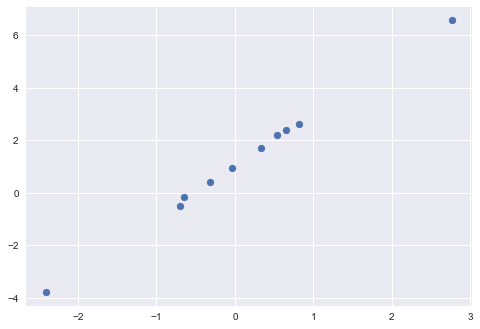

In [189]:
#构造数据集
num=10
para_num=2#参数数量(x_1,x_2,……,b)
w=torch.tensor([2.,1.])#参数数值

def train_data(num,para_num,w):
    x=torch.ones(num,para_num)
    norm_x=torch.normal(0,1,(num,para_num-1))
    x[:,:para_num-1]=norm_x[:,:para_num-1]
    y=torch.mv(x,w)+torch.normal(0,0.1,(num,1))[:,0]
    return(x,y)

a=train_data(num,para_num,w)
plt.style.use('seaborn')
fig,ax=plt.subplots()
x=a[0] #自变量  加了齐次坐标
y=a[1] #因变量
ax.scatter(a[0][:,0],a[1])


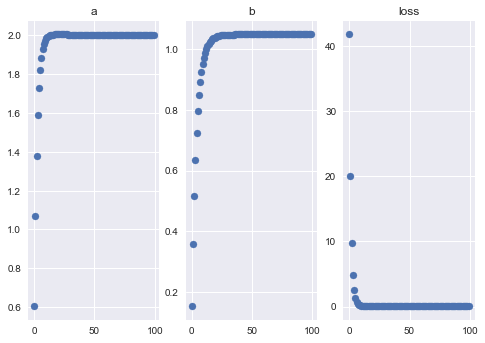

In [190]:
# 梯度下降算法
w1=torch.rand(2,requires_grad=True)#初始
lr=0.01#学习率
epochs=100
def sgd0(para_num,epochs,lr,w,x,y):
    res=torch.zeros(epochs,para_num+1)#还有loss
    for epoch in range(epochs):
        loss=(torch.mv(x,w)-y)**2#loss函数matrix-vector
        loss.sum().backward()
        res[epoch,:para_num]=w.detach()
        res[epoch,para_num]=loss.sum().detach()
        with torch.no_grad():#更新时不用计算梯度
            #非常重要
            w-=(w.grad)*lr
            w.grad.zero_()  
    return res
ans=sgd0(2,epochs,lr,w1,x,y)
ans
plt.style.use('seaborn')
fig,ax=plt.subplots(1,3)
ax[0].set_title('a')
ax[1].set_title('b')
ax[2].set_title('loss')

for i in range(3):
    ax[i].scatter(range(epochs),[a[i] for a in ans])

In [191]:
y.unsqueeze_(-1)
y

tensor([[ 0.9590],
        [-0.4906],
        [ 0.4164],
        [-3.7847],
        [ 1.7181],
        [ 2.6060],
        [ 2.2153],
        [-0.1455],
        [ 2.3960],
        [ 6.5594]])

尝试升高维数
$$Awx=y\\
x(n\times 2)\\
w(2\times 3)\\
A(3\times 1)
$$


In [192]:
w1=torch.rand((2,3),requires_grad=True)#初始
A=torch.rand((3,1),requires_grad=True)
net=[w1,A]
lr=0.001#学习率
epochs=100

In [193]:
x@w1

tensor([[ 0.5250,  0.4836,  0.8063],
        [ 0.0659, -0.0509,  0.7456],
        [ 0.3312,  0.2579,  0.7807],
        [-1.1293, -1.4424,  0.5874],
        [ 0.7857,  0.7871,  0.8409],
        [ 1.1206,  1.1770,  0.8852],
        [ 0.9247,  0.9490,  0.8593],
        [ 0.1037, -0.0069,  0.7506],
        [ 1.0088,  1.0469,  0.8704],
        [ 2.4863,  2.7672,  1.0660]], grad_fn=<MmBackward0>)

In [194]:
def net_func(net,x):
    value=x
    for w in net:
        value=value@w
    return value

In [195]:
# 梯度下降算法
loss_lst=[]
def sgd(epochs,lr,net,x,y):
    for _ in range(epochs):
        value=net_func(net,x)
        loss=(value-y)**2 #loss函数matrix-vector
        loss.sum().backward()
        l=loss.sum().detach()
        loss_lst.append(l)
        print(f'loss= {l}')
        with torch.no_grad():#更新时不用计算梯度
            #非常重要
            for w in net:
                w-=(w.grad)*lr
                w.grad.zero_()
    return net
ans=sgd(epochs,lr,net,x,y)

loss= 15.359933853149414
loss= 13.191898345947266
loss= 11.274410247802734
loss= 9.597452163696289
loss= 8.146129608154297
loss= 6.902000904083252
loss= 5.844441890716553
loss= 4.951904296875
loss= 4.203019618988037
loss= 3.5774195194244385
loss= 3.0563251972198486
loss= 2.622896194458008
loss= 2.262364625930786
loss= 1.9620424509048462
loss= 1.7111928462982178
loss= 1.5008571147918701
loss= 1.3236496448516846
loss= 1.173527717590332
loss= 1.0455838441848755
loss= 0.9358524680137634
loss= 0.841140866279602
loss= 0.758879542350769
loss= 0.6870030164718628
loss= 0.6238463521003723
loss= 0.5680630207061768
loss= 0.5185618996620178
loss= 0.474450021982193
loss= 0.4349972605705261
loss= 0.3995966911315918
loss= 0.3677426874637604
loss= 0.33901160955429077
loss= 0.3130440413951874
loss= 0.2895324230194092
loss= 0.26821309328079224
loss= 0.24885691702365875
loss= 0.2312641739845276
loss= 0.21525998413562775
loss= 0.20068904757499695
loss= 0.18741454184055328
loss= 0.17531481385231018
loss= 0.

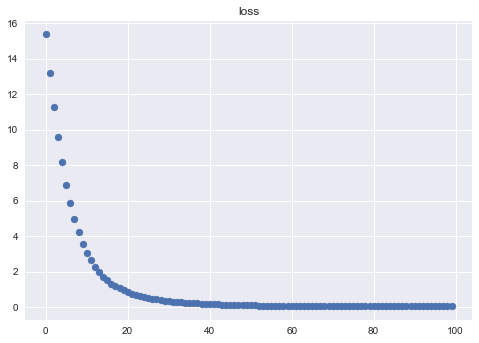

In [196]:
plt.style.use('seaborn')
fig,ax=plt.subplots(1,1)
ax.set_title('loss')

ax.scatter(range(epochs),loss_lst)

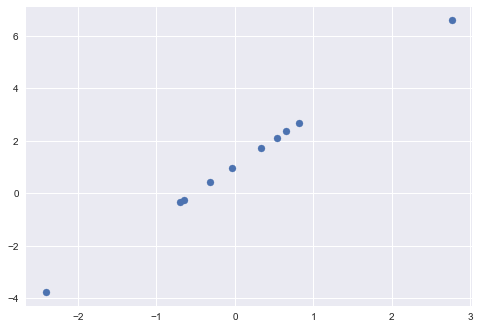

In [197]:
fig,ax=plt.subplots()
x=a[0] #自变量  加了齐次坐标
y=net_func(net,a[0]) #因变量
ax.scatter(x[:,0],y.detach().reshape_as(x[:,0]))

In [198]:
net

[tensor([[0.9663, 1.1143, 0.2969],
         [0.4229, 0.3686, 0.7218]], requires_grad=True),
 tensor([[0.8262],
         [0.9481],
         [0.4954]], requires_grad=True)]


$$y=2x_1-3.4x_2+4.2$$

In [199]:
from torch.utils import data
#利用api简洁实现 

t=train_data(10,3,torch.tensor([2.,-3.4,4.2]))
feature,lables=t[0][:,:para_num-1],t[1].unsqueeze(-1)#去除齐次坐标

#注意unsqueeze(-1)用于从[10]升维成[10,1]

def load_array(data_array,batch_size,is_train=True):
    dataset=data.TensorDataset(*data_array)#给元组解包
    return data.DataLoader(dataset,batch_size,shuffle=is_train)#随机挑选batch_size个

batch_size=10
data_iter=load_array((feature,lables),batch_size,True)

feature.shape,lables.shape,next(iter(data_iter))

(torch.Size([10, 1]),
 torch.Size([10, 1]),
 [tensor([[-0.3101],
          [ 0.1193],
          [-0.8039],
          [-0.1455],
          [-0.4490],
          [-0.4711],
          [ 0.1904],
          [ 0.2630],
          [ 1.4236],
          [ 0.5387]]),
  tensor([[ 0.5264],
          [-0.0822],
          [ 3.6710],
          [ 1.2643],
          [ 4.7617],
          [ 1.2875],
          [ 4.4693],
          [ 0.2595],
          [ 3.8800],
          [ 5.9698]])])

In [200]:
from torch import nn

net=nn.Sequential(nn.Linear(2,1))#输入为2,输出为1
para_num=3
t=train_data(10,3,torch.tensor([2.,-3.4,4.2]))
feature,lables=t[0][:,:para_num-1],t[1].unsqueeze(-1)#去除齐次坐标
def load_array(data_array,batch_size,is_train=True):
    dataset=data.TensorDataset(*data_array)#给元组解包
    return data.DataLoader(dataset,batch_size,shuffle=is_train)#随机挑选batch_size个

batch_size=10
data_iter=load_array((feature,lables),batch_size,True)

feature.shape,lables.shape,next(iter(data_iter))

(torch.Size([10, 2]),
 torch.Size([10, 1]),
 [tensor([[ 0.3370, -0.9153],
          [-0.6095,  0.6299],
          [-1.3922,  0.9131],
          [-1.4459, -1.3479],
          [-0.5990,  1.1618],
          [ 1.0819, -0.8286],
          [-0.6869,  0.2058],
          [ 0.8927,  0.4735],
          [-0.4811, -0.4705],
          [ 0.1342, -0.4431]]),
  tensor([[ 7.9661],
          [ 0.7883],
          [-1.7873],
          [ 5.8978],
          [-0.8207],
          [ 9.1927],
          [ 2.0195],
          [ 4.5162],
          [ 4.8954],
          [ 5.9299]])])

In [201]:
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [202]:

loss=nn.MSELoss()#Mean Square Error

#实例化Stochastic Gradient Descent(SGD)随机梯度下降
trainer=torch.optim.SGD(net.parameters(),lr=0.03)

for epoch in range(epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(feature), lables)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 24.463436
epoch 2, loss 22.055332
epoch 3, loss 19.895271
epoch 4, loss 17.956436
epoch 5, loss 16.215055
epoch 6, loss 14.650042
epoch 7, loss 13.242665
epoch 8, loss 11.976290
epoch 9, loss 10.836120
epoch 10, loss 9.808989
epoch 11, loss 8.883178
epoch 12, loss 8.048234
epoch 13, loss 7.294843
epoch 14, loss 6.614686
epoch 15, loss 6.000340
epoch 16, loss 5.445167
epoch 17, loss 4.943228
epoch 18, loss 4.489212
epoch 19, loss 4.078358
epoch 20, loss 3.706404
epoch 21, loss 3.369526
epoch 22, loss 3.064291
epoch 23, loss 2.787618
epoch 24, loss 2.536738
epoch 25, loss 2.309163
epoch 26, loss 2.102653
epoch 27, loss 1.915193
epoch 28, loss 1.744968
epoch 29, loss 1.590343
epoch 30, loss 1.449842
epoch 31, loss 1.322138
epoch 32, loss 1.206028
epoch 33, loss 1.100430
epoch 34, loss 1.004364
epoch 35, loss 0.916946
epoch 36, loss 0.837375
epoch 37, loss 0.764928
epoch 38, loss 0.698952
epoch 39, loss 0.638851
epoch 40, loss 0.584090
epoch 41, loss 0.534182
epoch 42, loss 0

In [203]:
net[0].weight.data,net[0].bias.data

(tensor([[ 1.9736, -3.3804]]), tensor([4.1682]))